### What is Feature Engineering?

It is the process of using domain knowledge to extract features from raw data via data mning techniques.

Three general approaches:
* extracting Information
* combining Information
* transforming information

in case of transforming information like categorical column transformation :

* Integer Encoding
* One Hot Encoding

In case of Integer encoding the advantage is , it doesnt increases the no of feature columns while for One hot Encoding i.e. Dummy encoding it increases the no of feature columns

### Dealing with outliers

definition of an outlier:
* range and limits based on
   *IQR
   *SD
   *Visuaized(scatter plot) or domain limit value(previous historical value)
   
   
* Percentage of Data
  *if large percentage of data are being termed as outliers then we have actually a wide distribution
  * limit outliers to a few percentage opoints at most




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    
    np.random.seed(seed)
    
    sample_ages=np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages=np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample=create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

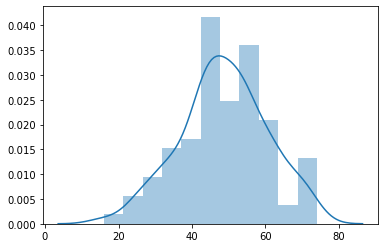

In [5]:
#checking the distribution of sample ages to detect any outlier
sns.distplot(sample)

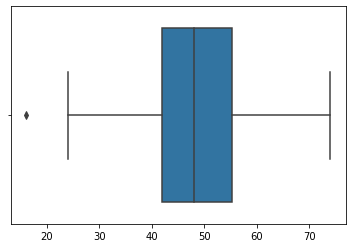

In [6]:
sns.boxplot(sample)

* Based on 1.5 X IQR we have a outlier here

In [7]:
ser=pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR= 55.25-42.0 #75th quartile-25th quartile
lower_limit=42.0-1.5*(IQR)

In [10]:
lower_limit

22.125

If we look at the box plot we can see that the observation that is classified as an outlier is indeed below the lower limit of 22.125

In [11]:
ser[ser>lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

### Alternative way of getting outlier range

In [12]:
np.percentile(sample,[75,25]) #gives the 75th and 25th percentile

array([55.25, 42.  ])

In [13]:
Q75,Q25=np.percentile(sample,[75,25])
iqr=Q75-Q25

In [14]:
iqr

13.25

In [15]:
lower_limit=Q25-1.5*iqr

In [16]:
lower_limit

22.125

### another way of analysing outliers

In [17]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\\Ames_Housing_Data.csv")

In [18]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
df.corr()['SalePrice'] #to get the correlation of every single variable in our data with the target variable

PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0.015691
Mo Sold            0

In [20]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

We observe that overall quality is strongly correlated with sales price

so we try to plot their relation

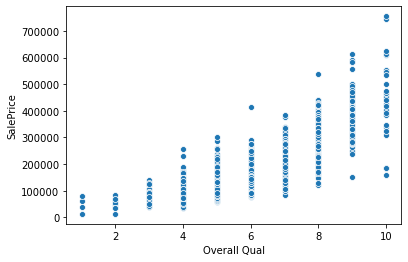

In [21]:
sns.scatterplot(x="Overall Qual",y="SalePrice",data=df)

Overall Quality has range between 1 and 10 we can detect that from the plot and we can also see some outliers.

As quality goes up  sales price rises.

We can also see that in case of quality 6 there are certain plots or observations which although low in quality are selling at higher prices. Those are outliers

We also try to check the correlation between sale price and the next highest correlated feature that is Gr Liv area

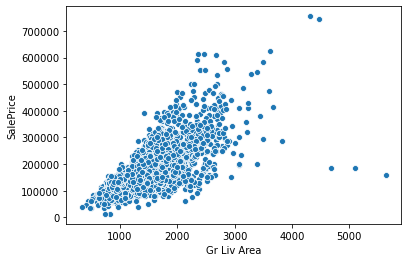

In [22]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

We see that there are certain houses with high liv area but are getting sold at low price

In [23]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


These are the four observations that have high quality but are getting sold at low price

we can see from the liv area and sale price scatter plot that there are three houses that have high liv area but are getting sold at lower price , so we can remove those from our data

In [24]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


So we can see that in case of both of the highly correlated features like Overall quality and Gr Liv Area, there are three observations common between them that can be classified as outliers and it depends on us whether we want to classify observation 1182 as a outlier 

In [25]:
drop_ind=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index

In [26]:
df=df.drop(drop_ind,axis=0) # we are droppingthe outliers

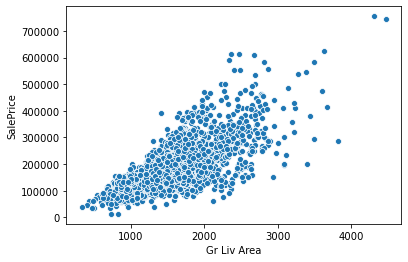

In [27]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

In [28]:
df.to_csv("my_ouliers_removed_Housing") #saving the outlier removed dataset

## Dealing with Missing Data

In [29]:
with open("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\\Ames_Housing_Feature_Description.txt","r")as f:
    print(f.read())
    #it helps in opening and reading a text file

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [30]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\\Ames_Outliers_Removed.csv")

In [31]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [34]:
df.shape

(2927, 81)

In [35]:
df=df.drop("PID",axis=1)

In [36]:
df.shape

(2927, 80)

In [37]:
df.isnull().sum() #missing values

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [38]:
#percentage of missing null values
100* df.isnull().sum()/len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

* 16.74 % percentage of Lot Frontage data is missing

In [42]:
## Creating a function for null values
## sort by percentage of null values
def percent_missing(df):
    percent_nan=100*df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    
    
    return percent_nan

In [43]:
percent_nan=percent_missing(df)

In [44]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

So we see that pool QC contains the most nulll values so we need to research deep about that feature

(0.0, 1.0)

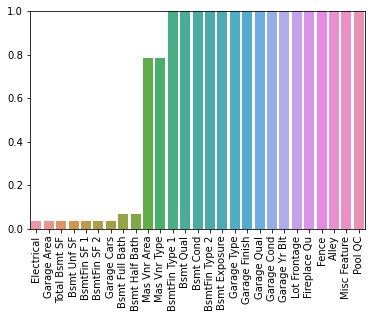

In [49]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1) # as y values have percentage between 0 and 10 %

 There are certain features that are missing very low percent values and it is sensible to drop those

In [50]:
percent_nan[percent_nan<1] # that have percentage less than 1%

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

here 11 features have missing values

In [51]:
df[df['Electrical'].isnull()] #rows where electrical is missing

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


we try to see whether it is the same row where electrical is missing there garage area is also missing as they have same percent of null values

In [52]:
df[df['Electrical'].isnull()]['Garage Area'] 

1576    400.0
Name: Garage Area, dtype: float64

So the row that is missing electrical has a garage area so garage area is ot missing here

In [53]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [54]:
df=df.dropna(axis=0,subset=['Electrical','Garage Cars'])
#dropping rows that have electrical and garage area missing

In [55]:
percent_nan=percent_missing(df)

In [56]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

Here 8 features have missing values, compared to previously 11 so droppng null values from electrical and garage area helped us in dropping null values from many other features as well

(0.0, 1.0)

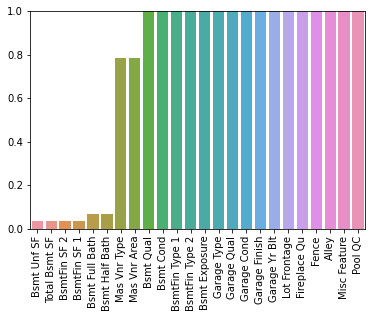

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1) # as y values have percentage between 0 and 10 %

In [59]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [60]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


So weobserve that same two rows are missing for full and half bath

In [61]:
df[df["Bsmt Unf SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


row no 1341 has these three features missing

In [63]:
#BSMT NUMERIC COLUMNS--> fillna 0
bsmt_num_cols=['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',
              'Bsmt Full Bath','Bsmt Half Bath']
#we include all the features from the document that has Bsmt in it and are numerical values 0 or 1 and fill the missing ones with 0
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#BSMT STRING COLUMNS
bsmt_str_cols=['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
              'BsmtFin Type 2']
df[bsmt_str_cols]=df[bsmt_str_cols].fillna('None')

In [64]:
percent_nan=percent_missing(df)

In [65]:
percent_nan[percent_nan<1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

(0.0, 1.0)

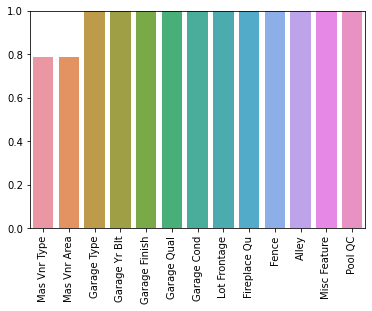

In [66]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1) # as y values have percentage between 0 and 10 %

In [71]:
## we look in the column mass vnr type in the documentation
#so we observe that there is a none category in mas vnr type

# we fill all the missing values in Mas vnr Type with None string as there is already a none category
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna("None") 




In [72]:
#similarly we look and decide for mas vnr area
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

In [73]:
percent_nan=percent_missing(df)

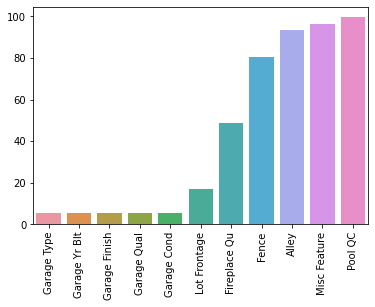

In [75]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
 # as y values have percentage between 0 and 10 %

In [76]:
#taking the garage str cols as if garage is missing then all other things will also be missing.
#so replacing all of them with 'None'
gar_str_cols=['Garage Type','Garage Finish','Garage Qual',
             'Garage Cond']
df[gar_str_cols]=df[gar_str_cols].fillna("None")

In [77]:
percent_nan=percent_missing(df)

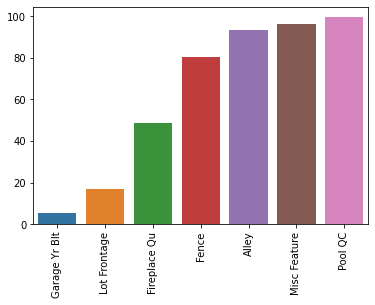

In [78]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
 

In [79]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)
#its a numerical col so we are filling with 0
#but it is very arbitary decision to have a year with 0 as a value
#instead we can also calculate the most appearing year and replace the values with it
#or most appropriate case since there are small no of values it is best to drop those

In [80]:
percent_nan=percent_missing(df)

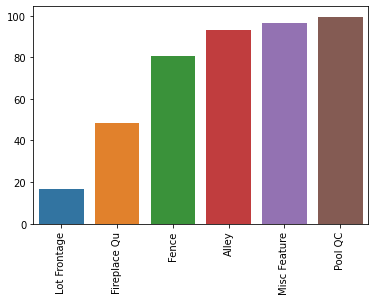

In [81]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
 

In [82]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)
# as these features are quite a large number of values

In [83]:
percent_nan=percent_missing(df)

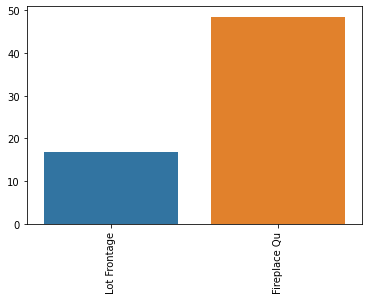

In [84]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
 

In [85]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [86]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna("None")

In [87]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

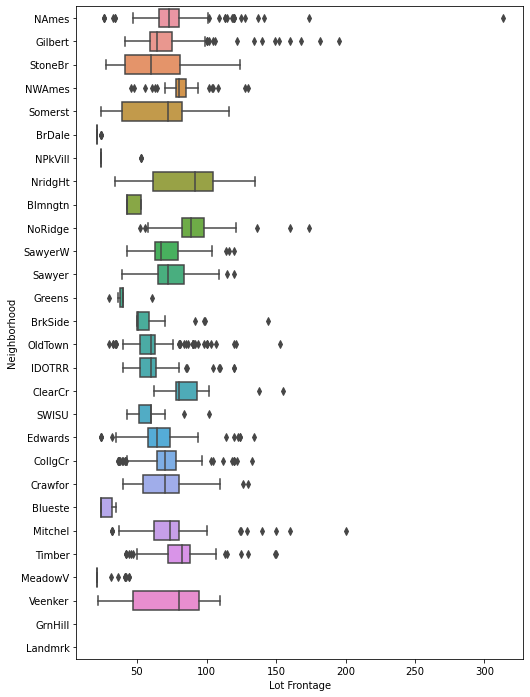

In [90]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [95]:
#here we are grouping lot frontage by neighborhood and replacing the null values with mean lot fronatge neighborhood values
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))
#.transform takes rows and replaces the nan values

In [96]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Mas Vnr type      0
Length: 77, dtype: int64

In [97]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [98]:
df.to_csv("removed_null_values_housing")

## Categorical data Encoding

In [100]:
df['MS SubClass']=df['MS SubClass'].apply(str)

In [102]:
### example

direction=pd.Series(['Up','Up','Down'])
pd.get_dummies(direction,drop_first=True)

,Up
0,1
1,1
2,0


In [107]:
my_object_df=df.select_dtypes(include='object') # all object classes are displayed

In [108]:
my_numeric_df=df.select_dtypes(exclude='object')

In [109]:
df_object_dummies=pd.get_dummies(my_object_df,drop_first=True)

In [110]:
df_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Mas Vnr type_BrkFace,Mas Vnr type_CBlock,Mas Vnr type_None,Mas Vnr type_Stone
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2924,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2925,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [111]:
final_df=pd.concat([my_numeric_df,df_object_dummies],axis=1)

In [112]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 278, dtype: float64

### Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Train - Test Split Procedure

* clean and adjust data as necessary for X and y
* Split Data in Train/test for both X and y
* Fit/Train Scaler on Training X data
* Scale X Test Data
* Create Model
* Fit/train Model on X Train Data
* Evaluate Model on X test Data (by creating predictions and comparing to Y_test)
* Adjust parameters as necessary and repeat steps 5 and 6

In [4]:
X=df.drop('sales',axis=1)

In [5]:
y=df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
### scaling data
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [13]:
scaled_X_train=scaler.transform(X_train)

In [14]:
scaled_X_test=scaler.transform(X_test)

In [15]:
from sklearn.linear_model import Ridge

In [16]:
model=Ridge(alpha=100)

In [17]:
model.fit(scaled_X_train,y_train)

Ridge(alpha=100)

In [18]:
y_pred=model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
MSE=mean_squared_error(y_pred,y_test)

In [21]:
MSE

7.341775789034128

In [23]:
#changing the alpha value and checking again
model_two=Ridge(alpha=1)
model_two.fit(scaled_X_train,y_train)
y_pred_two=model_two.predict(scaled_X_test)
mean_squared_error(y_pred_two,y_test)

2.3190215794287514

Here although the mse decreases, it is not the most fair evaluations since the model has already seen the test data before model_two 

### Train-Test_Validation Split

In [24]:
X=df.drop('sales',axis=1)
y=df['sales']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#1st split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
#2nd Split
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [29]:
X_train.shape,X_eval.shape,X_test.shape

((140, 3), (30, 3), (30, 3))

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
scaler.fit(X_train) #fitting only training data

StandardScaler()

In [33]:
scaled_X_train=scaler.transform(X_train)

In [34]:
scaled_X_test=scaler.transform(X_test)

In [35]:
scaled_X_eval=scaler.transform(X_eval)

In [38]:
from sklearn.linear_model import Ridge
model_one=Ridge(alpha=100)

In [39]:
model_one.fit(scaled_X_train,y_train)

Ridge(alpha=100)

In [43]:
y_eval_pred=model_one.predict(scaled_X_eval)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_eval,y_eval_pred) #evaluation on validation data

7.320101458823869

In [48]:
model_two=Ridge(alpha=1)
model_two.fit(scaled_X_train,y_train)
new_y_eval_pred=model_two.predict(scaled_X_eval)
mean_squared_error(y_eval,new_y_eval_pred) #evaluation on validation data

2.3837830750569853

so now since there is a decrease in mse when i take alpha=1 and again fit and predict the model on validation test based on previous result.
It is now fair to evaluate my model by predictin on test set since my model has not seen this till now

In [49]:
y_final_test_pred=model_two.predict(scaled_X_test)

In [51]:
mean_squared_error(y_test,y_final_test_pred)

2.254260083800517

This mse is lower than the previous error so our model is performing well

### Using K fold cross validation

In [52]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Advertising.csv")

In [53]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
X=df.drop('sales',axis=1)
y=df['sales']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#1st split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [58]:
model=Ridge(alpha=100)

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
scores=cross_val_score(model,scaled_X_train,y_train,scoring='neg_mean_squared_error',
                       cv=5)

In [61]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [62]:
abs(scores.mean())

8.215396464543606

In [64]:
model_two=Ridge(alpha=1)

In [66]:
scores=cross_val_score(model_two,scaled_X_train,y_train,scoring='neg_mean_squared_error',
                       cv=5)

In [67]:
scores

array([-3.15513238, -1.58086982, -5.40455562, -2.21654481, -4.36709384])

In [68]:
abs(scores.mean())

3.3448392965306946

So we see that there is a improvement in the model

In [69]:
model_two.fit(scaled_X_train,y_train)

Ridge(alpha=1)

In [71]:
y_final_test_pred=model_two.predict(scaled_X_test)

In [73]:
mean_squared_error(y_test,y_final_test_pred)

2.3190215794287514

### cross_validate

In [74]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Advertising.csv")

In [75]:
X=df.drop('sales',axis=1)
y=df['sales']

#1st split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)


In [76]:
from sklearn.model_selection import cross_validate

In [77]:
model=Ridge(alpha=100)

In [79]:
scores=cross_validate(model,scaled_X_train,y_train,
                     scoring=['neg_mean_squared_error',
                             'neg_mean_absolute_error'],cv=10)

In [80]:
scores

{'fit_time': array([0.01099992, 0.00200176, 0.00199389, 0.00324678, 0.00200009,
        0.00200105, 0.00199866, 0.00200033, 0.00199962, 0.00299954]),
 'score_time': array([0.006001  , 0.0009985 , 0.00099945, 0.00197434, 0.00199866,
        0.00100088, 0.00200033, 0.00100017, 0.        , 0.00077915]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [81]:
scores=pd.DataFrame(scores)

In [82]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.011000,0.006001,-6.060671,-1.810212
1,0.002002,0.000998,-10.627031,-2.541958
2,0.001994,0.000999,-3.993426,-1.469594
3,0.003247,0.001974,-5.009494,-1.862769
4,0.002000,0.001999,-9.141800,-2.520697
5,0.002001,0.001001,-13.086256,-2.459995
6,0.001999,0.002000,-3.839405,-1.451971
7,0.002000,0.001000,-9.058786,-2.377395
8,0.002000,0.000000,-9.055457,-2.443344
9,0.003000,0.000779,-5.778882,-1.899797


In [83]:
scores.mean()

fit_time                        0.003124
score_time                      0.001675
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [84]:
model=Ridge(alpha=1)

In [85]:
scores=cross_validate(model,scaled_X_train,y_train,
                     scoring=['neg_mean_squared_error',
                             'neg_mean_absolute_error'],cv=10)

In [86]:
scores

{'fit_time': array([0.00200176, 0.002002  , 0.00200272, 0.00200009, 0.00199938,
        0.00099993, 0.00199986, 0.00200415, 0.00100112, 0.00199914]),
 'score_time': array([0.00199938, 0.00199962, 0.0009985 , 0.00200057, 0.00099897,
        0.00100017, 0.00099897, 0.00099659, 0.00199795, 0.00099897]),
 'test_neg_mean_squared_error': array([-2.96250773, -3.05737833, -2.1737403 , -0.83303438, -3.46401792,
        -8.2326467 , -1.90586431, -2.76504844, -4.98950515, -2.84643818]),
 'test_neg_mean_absolute_error': array([-1.45717399, -1.5553078 , -1.23877012, -0.76893775, -1.43448944,
        -1.4943158 , -1.08136203, -1.25001123, -1.58097132, -1.22332553])}

In [87]:
scores=pd.DataFrame(scores)

In [88]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.002002,0.001999,-2.962508,-1.457174
1,0.002002,0.002000,-3.057378,-1.555308
2,0.002003,0.000998,-2.173740,-1.238770
3,0.002000,0.002001,-0.833034,-0.768938
4,0.001999,0.000999,-3.464018,-1.434489
5,0.001000,0.001000,-8.232647,-1.494316
6,0.002000,0.000999,-1.905864,-1.081362
7,0.002004,0.000997,-2.765048,-1.250011
8,0.001001,0.001998,-4.989505,-1.580971
9,0.001999,0.000999,-2.846438,-1.223326


In [89]:
scores.mean()

fit_time                        0.001801
score_time                      0.001399
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

so we are improving on our model.

In [90]:
#Now predicting on test set
model.fit(scaled_X_train,y_train)

Ridge(alpha=1)

In [91]:
y_final_pred=model.predict(scaled_X_test)

In [93]:
mean_squared_error(y_final_pred,y_test)

2.3190215794287514

### Grid Search

A grid search is a way of training and validating a model on every possible combination of multiple hyperparameter options.

scikit Learn includes a GridSearchCv class capable of testing adictionary of mutiple y per parameter options through cross-validation.

This allows for both cross-validation and a grid search to be performed in a generalized way for any model

In [94]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Advertising.csv")

In [95]:
X=df.drop('sales',axis=1)
y=df['sales']

#1st split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)


In [96]:
from sklearn.linear_model import ElasticNet

In [97]:
base_elastic_net_model=ElasticNet()

In [98]:
param_grid={'alpha':[0.1,1,5,10,50,100],
            'l1_ratio':[.1,.5,.7,.95,.99,1]}

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
grid_model=GridSearchCV(estimator=base_elastic_net_model,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5,verbose=2)

In [101]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] 

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [102]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [103]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [104]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009070,1.465996e-02,0.000999,0.000632,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.001400,4.896097e-04,0.000400,0.000490,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.001452,5.825974e-04,0.000815,0.000225,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.001601,4.900204e-04,0.000801,0.000401,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.002001,8.953755e-04,0.001200,0.000980,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.002399,4.894766e-04,0.001202,0.000400,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.002802,7.483078e-04,0.000999,0.000632,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.001802,4.011898e-04,0.001001,0.001095,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.002402,8.005388e-04,0.001000,0.000633,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.002000,6.333903e-04,0.001201,0.000399,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


In [105]:
y_pred=grid_model.predict(scaled_X_test)

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
mean_squared_error(y_pred,y_test)

2.3873426420874737